
# CNN With Fashion MNIST


In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

### Loading And Shaping Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f'x_train shape: {x_train.shape}\nnumber of classes: {len(set(y_train))}')

x_train shape: (60000, 28, 28)
number of classes: 10


In [4]:
# to make convolution operation possible on those images we need to add 3rd dimension to them
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'x_train shape: {x_train.shape}')

x_train shape: (60000, 28, 28, 1)


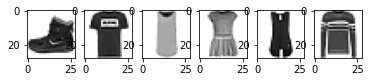

In [5]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
ax1.imshow(np.reshape(x_train[0], (28, 28)), cmap = 'gray_r')
ax2.imshow(np.reshape(x_train[1], (28, 28)), cmap = 'gray_r')
ax3.imshow(np.reshape(x_train[2], (28, 28)), cmap = 'gray_r')
ax4.imshow(np.reshape(x_train[3], (28, 28)), cmap = 'gray_r')
ax5.imshow(np.reshape(x_train[4], (28, 28)), cmap = 'gray_r')
ax6.imshow(np.reshape(x_train[5], (28, 28)), cmap = 'gray_r')

### Building Model

In [6]:
# input layer
i = Input(shape=x_train[0].shape)

# layers performing convolution
# (filter size: 3x3, image size reduces by half in both dims on every layer)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# layer flattening input for Dense layers
x = Flatten()(x)

# Dropout layers to improve generalization
# Dense layer to classify images based on convolutional layers output
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)

# output layer with sofmax activation for % classification results
x = Dense(len(set(y_train)), activation='softmax')(x)

model = Model(i, x)

### Compiling And Fitting Model

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5773 - accuracy: 0.7985 - val_loss: 0.4151 - val_accuracy: 0.8451
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4024 - accuracy: 0.8497 - val_loss: 0.3829 - val_accuracy: 0.8565
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3597 - accuracy: 0.8654 - val_loss: 0.3702 - val_accuracy: 0.8636
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8734 - val_loss: 0.3585 - val_accuracy: 0.8681
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3208 - accuracy: 0.8799 - val_loss: 0.3810 - val_accuracy: 0.8676
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3078 - accuracy: 0.8847 - val_loss: 0.3564 - val_accuracy: 0.8638
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.8905 - val_loss: 0.3694 - val_accuracy:

### Analysing Results

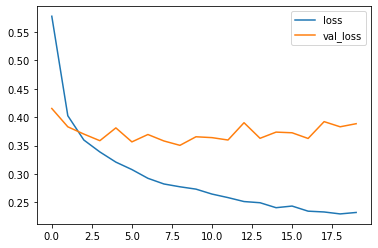

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

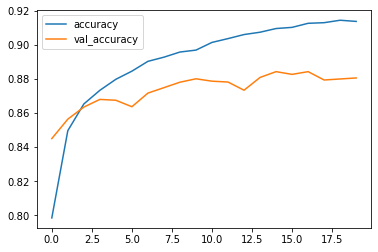

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

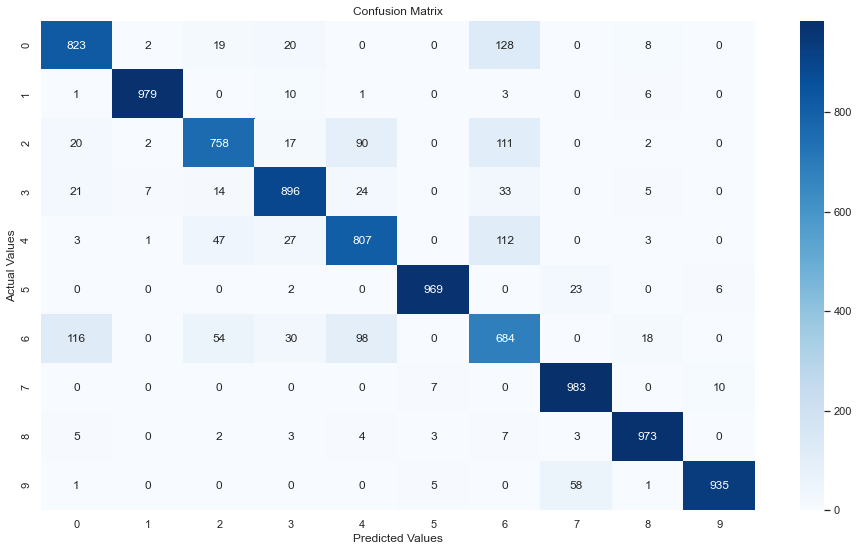

In [44]:
p_test = model.predict(x_test).argmax(axis=1)
cf_matrix = confusion_matrix(y_test, p_test)

sns.set(rc = {'figure.figsize':(16,9)})

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(range(10))
ax.yaxis.set_ticklabels(range(10))

plt.show()